In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

In [2]:
df=pd.read_csv('../data/clean_data.csv')
data=df.copy()
data=data.drop(['customerID','Churn'],axis=1)
data=pd.get_dummies(data,columns=list(data.columns))
data.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,...,PaymentMethod_2,PaymentMethod_3,tenure_disc_corr_0,tenure_disc_corr_1,tenure_disc_corr_2,tenure_disc_corr_3,TotalCharges_disc_corr_0,TotalCharges_disc_corr_1,TotalCharges_disc_corr_2,TotalCharges_disc_corr_3
0,1,0,1,0,0,1,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0
3,0,1,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,1,0,1,0,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0


In [3]:
x=data.copy()

In [5]:
#Creamos el espacio de soluciones
soluciones = list(range(3,7))

#Creamos varias listas para ir guardando la salida de cada métrica
codo = []
silueta = []
calins = []
davies = []

#Probamos las diferentes soluciones
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(random_state=1234, n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(x)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(x, cluster.labels_))
    calins.append(calinski_harabasz_score(x, cluster.labels_))
    davies.append(davies_bouldin_score(x, cluster.labels_))

In [6]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,51259.403525,0.185381,1428.941372,2.146463
4,48601.683901,0.159827,1132.885252,2.412835
5,46376.927469,0.153248,974.701343,2.381256
6,45022.806142,0.112597,845.429290,2.421370


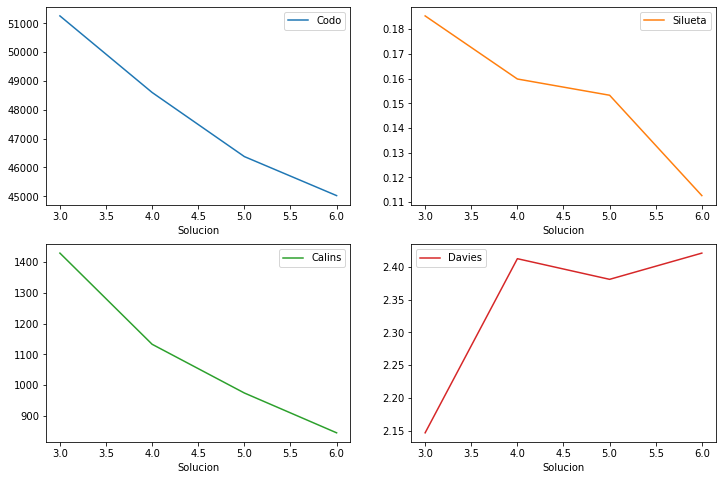

In [7]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

In [8]:
#Instanciar
cluster = KMeans(random_state=1234, n_clusters = 5, n_init=10)
    
#Entrenar
cluster.fit(x)

#Asignar segmento
x['cluster'] = cluster.predict(x)

x.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,...,PaymentMethod_3,tenure_disc_corr_0,tenure_disc_corr_1,tenure_disc_corr_2,tenure_disc_corr_3,TotalCharges_disc_corr_0,TotalCharges_disc_corr_1,TotalCharges_disc_corr_2,TotalCharges_disc_corr_3,cluster
0,1,0,1,0,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,0,0
1,0,1,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,3
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1,1,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,3
4,1,0,1,0,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0


In [9]:
data=pd.read_csv('../data/data_predicciones.csv')
data=pd.concat([data,x.cluster],axis='columns')
data.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,...,tenure_disc_corr_0,tenure_disc_corr_1,tenure_disc_corr_2,tenure_disc_corr_3,TotalCharges_disc_corr_0,TotalCharges_disc_corr_1,TotalCharges_disc_corr_2,TotalCharges_disc_corr_3,pred,cluster
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,0.590886,0
1,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0.034780,3
2,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0.312515,0
3,0,1,1,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0.038149,3
4,1,0,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0.757895,0


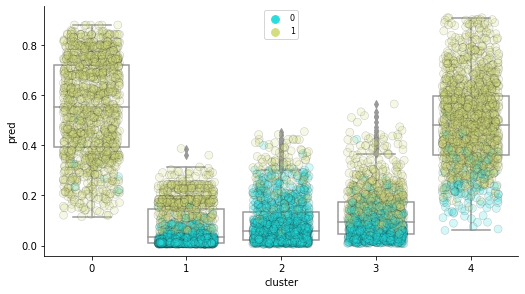

In [10]:
sns.catplot(x="cluster", y="pred", 
            data=data,
            kind="box", 
            height=4, 
            aspect=1.8, 
            color="white")
        # add data points to boxplot with stripplot
sns.stripplot(x="cluster", y="pred", 
              data=data,
              palette="rainbow",
              jitter=0.3,
              size=8, 
              edgecolor="black",
              linewidth=0.5,
              hue='Contract_0',
              alpha=0.2)
plt.legend(loc="upper center",fontsize=8)
plt.show()

In [11]:
data.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,...,tenure_disc_corr_0,tenure_disc_corr_1,tenure_disc_corr_2,tenure_disc_corr_3,TotalCharges_disc_corr_0,TotalCharges_disc_corr_1,TotalCharges_disc_corr_2,TotalCharges_disc_corr_3,pred,cluster
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,0.590886,0
1,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0.034780,3
2,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0.312515,0
3,0,1,1,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0.038149,3
4,1,0,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0.757895,0


In [12]:
df_original=pd.read_csv('../data/Telco-Customer-Churn_2.csv')

In [13]:
df=pd.concat([df_original,data],axis="columns")

In [14]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,tenure_disc_corr_0,tenure_disc_corr_1,tenure_disc_corr_2,tenure_disc_corr_3,TotalCharges_disc_corr_0,TotalCharges_disc_corr_1,TotalCharges_disc_corr_2,TotalCharges_disc_corr_3,pred,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,1,0,0,0,1,0,0,0,0.590886,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,0,1,0,0,0,1,0,0.034780,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,1,0,0,0,1,0,0,0,0.312515,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,0,1,0,0,0,1,0,0.038149,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,1,0,0,0,1,0,0,0,0.757895,0


In [16]:
df.to_csv('../data/final_data.csv')

In [25]:
import plotly.express as px
dff = df.copy()
fig = px.scatter_3d(df, x='Contract', 
                    y='tenure', 
                    z='pred',
                    color='cluster', 
                    #size='pred', 
                    #size_max=100,
                    symbol="InternetService",
                    opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  hovermode="x unified",
                  showlegend=True,
                  template="plotly_dark",
                  font_size=12)
